In [1]:
from statistics import correlation
import pandas as pd                     # using 'pd'  is standard by Python users
from pandas import DataFrame            # optional, good practice
from pandas import Series               # optional, good practice

import numpy as np
from matplotlib import pyplot as plt

#%matplotlib notebook

# 1. Load pokemon.csv into a pandas dataframe

In [2]:
# import Pokemon data
df = pd.read_csv('pokemon.csv', encoding='ISO-8859-1') #single byte character encoding

# Overall Information and Description
print("Overall Info:")
print(df.info())
print("\nOverall Description:")
print(df.describe())

Overall Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pokedex Number                 927 non-null    object 
 1   Pokemon Name                   927 non-null    object 
 2   Classification                 927 non-null    object 
 3   Legendary Type                 81 non-null     object 
 4   Height                         927 non-null    float64
 5   Weight                         927 non-null    float64
 6   Primary Type                   927 non-null    object 
 7   Secondary Type                 494 non-null    object 
 8   Primary Ability                927 non-null    object 
 9   Primary Ability Description    927 non-null    object 
 10  Secondary Ability              455 non-null    object 
 11  Secondary Ability Description  455 non-null    object 
 12  Hidden Ability                 720 n

# 2. Pick 5 features and analyze them
* stats, .describe, .info
* plot (histogram, boxplot, bar plot, etc.)
* create descriptive statements

**#1. Legendary vs Mythical vs Ultra Beast vs Normals**

In [3]:
# print stats
print(df['Legendary Type'].head())#to see actual data and types
print(df['Legendary Type'].tail())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Legendary Type, dtype: object
922    NaN
923    NaN
924    NaN
925    NaN
926    NaN
Name: Legendary Type, dtype: object


In [4]:
# statistical summary
print(df['Legendary Type'].describe())

count            81
unique            3
top       Legendary
freq             49
Name: Legendary Type, dtype: object


- Describe() explains info on the "Legendary Type" for 81 Pokemon (excluding regular Pokemon with NaN).
- There are 3 different types of legendaries in this list.
- The "Legendary" type is the most common among them, showing up 49 times.
- But most Pokemon in the list don't have a "Legendary Type" at all, which means they're just regular Pokemon.


In [5]:
# values in each column, column data types, and memory usage
print("\nInformation:")
print(df['Legendary Type'].info())


Information:
<class 'pandas.core.series.Series'>
RangeIndex: 927 entries, 0 to 926
Series name: Legendary Type
Non-Null Count  Dtype 
--------------  ----- 
81 non-null     object
dtypes: object(1)
memory usage: 7.4+ KB
None


* This tells us that many of the Pokemon do not have a specified "Legendary Type"(846). Based on the info, The most common non empty Legendary Type,  is "Legendary".

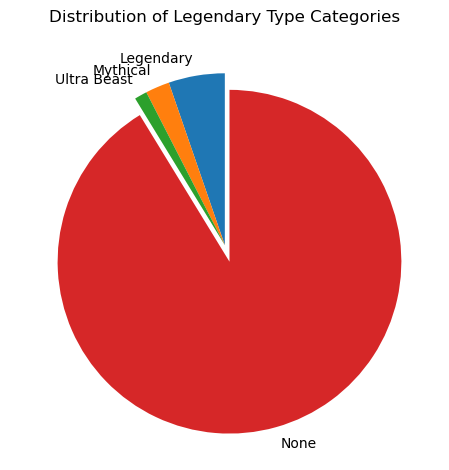

In [6]:
# plot
legendary_counts = df['Legendary Type'].value_counts()# count the type of Legendary appears in the column.
legendary_counts['None'] =  df['Legendary Type'].isna().sum()# isna() returns a boolean Series
                                                             # sum() then counts the true values indicating the number of NaNs

plt.pie(legendary_counts, labels=legendary_counts.index,startangle=90, explode=(0, 0, 0, .1))
plt.title('Distribution of Legendary Type Categories')
plt.tight_layout()
plt.show()

* The Large Red Section (None) of the pie char shows most Pokemon do not have a designated "Legendary Type." Most Pokemon fall into the regular or 'None' category.

* The blue segment (Legendary) on the pie chart highlights the Pokemon categorized as "Legendary." While they are more common than the other special categories, they are still less common than regular Pokemon.

* The 'Mythical' Pokemon in the Orange Section: Compared to the "Legendary" Pokemon, they are less common.

* The Green Section (Ultra Beast): The "Ultra Beast" Pokemon, the rarest category in the dataset, is represented by this narrow slice. According to this dataset, these Pokemon are the least common.


**2. Gender Ratio**

In [7]:
# print stats
print(df[['Male Ratio', 'Female Ratio']]) #to see actual data and types

     Male Ratio  Female Ratio
0          87.5          12.5
1          87.5          12.5
2          87.5          12.5
3          87.5          12.5
4          87.5          12.5
..          ...           ...
922        50.0          50.0
923        50.0          50.0
924        50.0          50.0
925        50.0          50.0
926        87.5          12.5

[927 rows x 2 columns]


In [8]:
# values in each column, column data types, and memory usage
print(df[['Male Ratio', 'Female Ratio']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Male Ratio    927 non-null    float64
 1   Female Ratio  927 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB
None


* The dataset contains 927 Pokemon entries, and neither the 'Male Ratio' nor the 'Female Ratio' columns contain any missing values. These columns contain data represented as floating-point numbers. This section of the dataset uses 14.6 KB of memory.


In [9]:
# statistical summary
print(df[['Male Ratio', 'Female Ratio']].describe())

       Male Ratio  Female Ratio
count  927.000000    927.000000
mean    47.613269     38.470874
std     26.915055     24.434781
min      0.000000      0.000000
25%     50.000000     12.500000
50%     50.000000     50.000000
75%     50.000000     50.000000
max    100.000000    100.000000


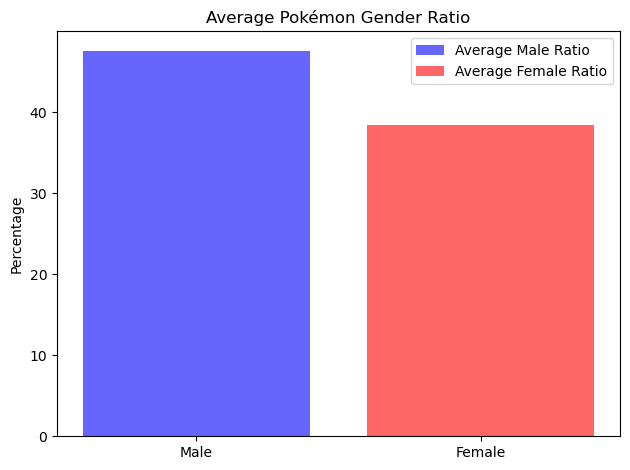

In [10]:
# plot
average_male_ratio = df['Male Ratio'].mean()
average_female_ratio = df['Female Ratio'].mean()

plt.bar('Male', average_male_ratio, label='Average Male Ratio', color='blue', alpha=.6)
plt.bar('Female', average_female_ratio, label='Average Female Ratio', color='red', alpha=.6)

plt.ylabel('Percentage')
plt.title('Average Pokémon Gender Ratio')
plt.legend()
plt.tight_layout()
plt.show()


* From the plot, it's evident that the male and female ratios for Pokémon species differ. On average, Pokémon are 47.61% male and 38.47% female.
* Male and female ratios have wide standard deviations of 26.92% and 24.43%.
* 50% of Pokemon species have equal gender distribution, suggesting an even gender distribution.
* 25% of Pokemon have lower female ratios, 12.5%, meaning every one out of four Pokémon species has at most 12.5% females in its population.
* However, both 25% and 75% percentiles are 50-to-50, indicating a common equal distribution for many species with clustering of a frequent 50% male ratio for many Pokemon species.
* Interestingly, some species are 100% male or female. (Then, how do they breed?)


**3. Height & Weight Ratio**

In [11]:
# print stats
print(df[['Height', 'Weight']]) #to see actual data and types

     Height  Weight
0       0.7     6.9
1       1.0    13.0
2       2.0   100.0
3       0.5     5.0
4       0.9    21.6
..      ...     ...
922     0.5    80.4
923     0.5    12.0
924     0.8     1.2
925     1.4    14.0
926     1.9   102.0

[927 rows x 2 columns]


In [12]:
# values in each column, column data types, and memory usage
print("\nInformation:")
print(df[['Height', 'Weight']].info())


Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  927 non-null    float64
 1   Weight  927 non-null    float64
dtypes: float64(2)
memory usage: 14.6 KB
None


* The DataFrame contains 'Height' and 'Weight' information for 927 entries. There are no missing (null) values in either column. The float64 data type indicates that both 'Height' and 'Weight' contain decimal values. This DataFrame uses approximately 14.6 KB of memory.


In [13]:
print("\n<Height & Weight>")
print(df[['Height', 'Weight']].describe())


<Height & Weight>
          Height      Weight
count  927.00000  927.000000
mean     1.26246   69.078209
std      1.30101  126.450808
min      0.10000    0.100000
25%      0.60000    9.200000
50%      1.00000   29.000000
75%      1.50000   69.100000
max     14.50000  999.900000


* The data for 927 individuals shows average 'Height' and 'Weight' of 1.262 meters and 69.078 kg. Heights range from 0.1 to 14.5 meters, with a median of 1 meter. Weights vary from 0.1 to 999.9 kg with a median of 29 kg. The max weight could be an outlier but need to see the plot for this.

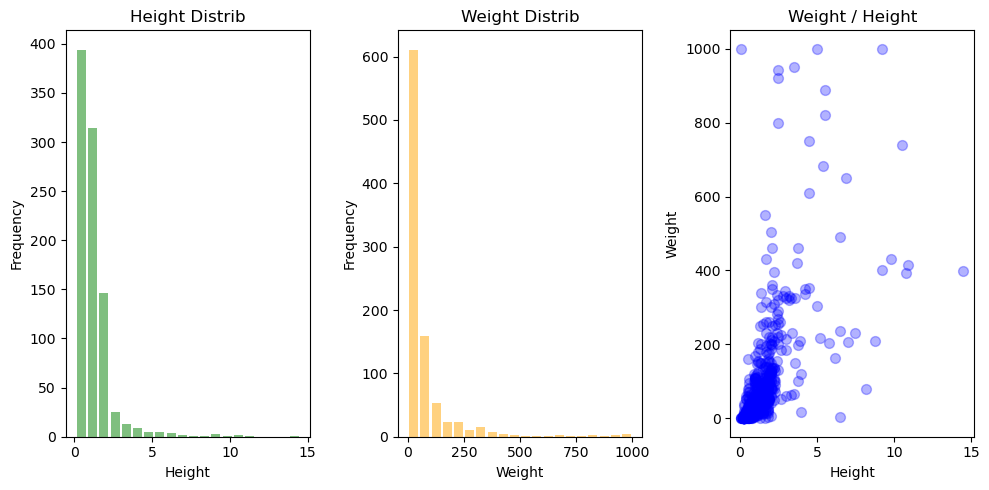

In [14]:
# plot
height = df['Height']
weight = df['Weight']

fig, axs = plt.subplots(1, 3, figsize=(10, 5))

#1. height destribution
axs[0].hist(height, alpha=0.5, color='green', rwidth=0.8, bins=20)
axs[0].set_title('Height Distrib')
axs[0].set_xlabel('Height')
axs[0].set_ylabel('Frequency')

#2. weight distribution
axs[1].hist(weight, alpha=0.5, color='orange', rwidth=0.8, bins=20)
axs[1].set_title('Weight Distrib')
axs[1].set_xlabel('Weight')
axs[1].set_ylabel('Frequency')

#3. weight / height
axs[2].scatter(height, weight, color='b', label='Pokemon', marker='o',alpha=0.3, s=50)
axs[2].set_title('Weight / Height')
axs[2].set_xlabel('Height')
axs[2].set_ylabel('Weight')

plt.tight_layout()
plt.show()

**Height**
* The majority of Pokemon are less than 5 units tall. As height increases, the frequency of Pokemon decreases dramatically.
* Few Pokemon are taller than 10 units.

**Weight**
* The vast majority of Pokemon are less than 250 units in weight. Weight, like height, has a sharp drop in frequency as it increases, with only a few Pokemon weighing more than 500 units.

**Weight/Height**
* Pokemon vary in length and weight, but most are short and light. Weight is much more variable than height (max at most 14.5), with some very heavy outliers (999.9). This suggests that while height might influence a Pokemon's weight, there are other factors at play.



**4. Ability Stats**

In [15]:
# print stats
base_stats = ['Health Base Stat', 'Attack Base Stat', 'Defense Base Stat', 
             'Special Attack Base Stat', 'Special Defense Base Stat', 'Speed Base Stat']
print(df[base_stats]) #to see actual data and types

     Health Base Stat  Attack Base Stat  Defense Base Stat  \
0                  45                49                 49   
1                  60                62                 63   
2                  80                82                 83   
3                  40                45                 35   
4                  50                65                 45   
..                ...               ...                ...   
922                70                85                140   
923                25                35                 40   
924                 1                90                 45   
925                72                58                 80   
926               100               150                110   

     Special Attack Base Stat  Special Defense Base Stat  Speed Base Stat  
0                          65                         65               45  
1                          80                         80               60  
2                         1

In [16]:
# values in each column, column data types, and memory usage
print("\nInformation:")
print(df[base_stats].info())


Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Health Base Stat           927 non-null    int64
 1   Attack Base Stat           927 non-null    int64
 2   Defense Base Stat          927 non-null    int64
 3   Special Attack Base Stat   927 non-null    int64
 4   Special Defense Base Stat  927 non-null    int64
 5   Speed Base Stat            927 non-null    int64
dtypes: int64(6)
memory usage: 43.6 KB
None


* The dataset contains 927 Pokemon's base stats : Health, Attack, Defense, Special Attack, Special Defense, and Speed. The dataset uses 43.6 KB of memory and all values are non-null integers.


In [17]:
# statistical summary
print(df[base_stats].describe())

       Health Base Stat  Attack Base Stat  Defense Base Stat  \
count        927.000000        927.000000         927.000000   
mean          69.531823         80.011866          74.393743   
std           26.056443         32.595679          31.396669   
min            1.000000          5.000000           4.000000   
25%           50.000000         55.000000          50.000000   
50%           67.000000         75.000000          70.000000   
75%           80.000000        100.000000          90.000000   
max          255.000000        190.000000         230.000000   

       Special Attack Base Stat  Special Defense Base Stat  Speed Base Stat  
count                927.000000                 927.000000       927.000000  
mean                  73.017260                  72.077670        68.327940  
std                   33.068221                  27.782525        29.349468  
min                   10.000000                  20.000000         5.000000  
25%                   50.000000  

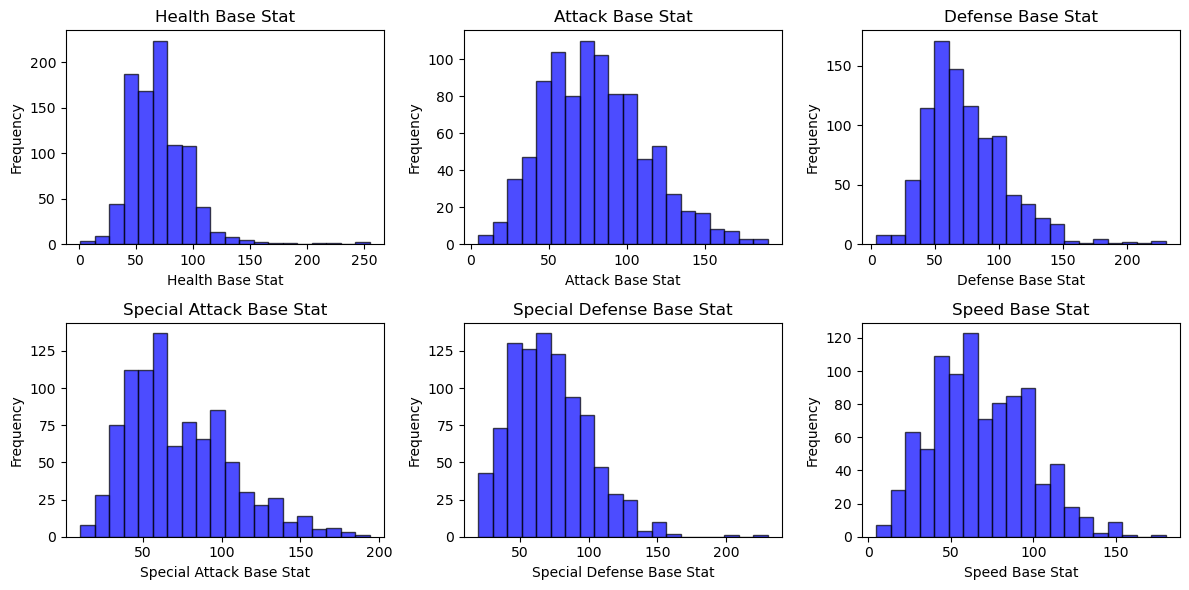

In [18]:
# plot
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

itr = 0
for row in range(2):
    for col in range(3):
        axs[row, col].hist(df[base_stats[itr]], bins=20, color='blue', edgecolor='black', alpha=0.7)
        axs[row, col].set_title(base_stats[itr]);
        axs[row, col].set_xlabel(base_stats[itr])
        axs[row, col].set_ylabel('Frequency')
        itr += 1

plt.tight_layout()
plt.show()

* Health Base Stat: The typical Pokemon has a base health stat within the range of 50-75. The median health stat is 67, and the mean is 69.53. While some Pokemon have a health stat as high as 255, others are as low as 1. This distribution is also evident in the plot.

* Attack Base Stat: Data predominantly clusters around 50-100, with a median of 75 and a mean of 80.01. Although the range spans from 5 to 190, the majority of Pokemon stats revolve around the median, as supported by the plot.

* Defense Base Stat: Most Pokemon defense stats lie between 50-100. The mean defense value is 74.39, with a median of 70. While the stats range from 4 to 230, many Pokemon hover near the median (slightly below), as supported by the plot.

* Special Attack Base Stat: The typical value for special attack is 65, and the average is 73.02, indicating that most Pokémon stats are situated between 40-80. This particular stat varies from 10 to 194,  as supported by the plot.

* Special Defense Base Stat: Pokemon's special defense stats are generally distributed between 50-100, with a median of 70 and an average of 72.08. Though the range extends from 20 to 230, a significant number of Pokémon stats cluster around the average, as depicted in the plot.

* Speed Base Stat: A median speed of 65 and an average of 68.33 suggest that many Pokémon possess speeds within the 50-90 units. The speed stats span from 5 to 180,  as supported by the plot.

**5. Experience Yield VS Catch Rate**

In [19]:
print(df[['Experience Yield', 'Catch Rate']])

     Experience Yield  Catch Rate
0                  64          45
1                 142          45
2                 236          45
3                  62          45
4                 142          45
..                ...         ...
922               165          90
923                46          90
924                83          45
925               172          45
926               286          45

[927 rows x 2 columns]


In [20]:
# values in each column, column data types, and memory usage
print("\nInformation:")
print(df[['Experience Yield', 'Catch Rate']].info())


Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Experience Yield  927 non-null    int64
 1   Catch Rate        927 non-null    int64
dtypes: int64(2)
memory usage: 14.6 KB
None


* Both "Experience Yield" and "Catch Rate" have non-null integer values. Total memory usage is 14.6 KB.

In [21]:
# statistical summary
print(df[['Experience Yield', 'Catch Rate']].describe()) 

       Experience Yield  Catch Rate
count        927.000000  927.000000
mean         153.697950   93.832794
std           79.254364   75.485678
min           36.000000    3.000000
25%           67.000000   45.000000
50%          159.000000   60.000000
75%          199.500000  127.000000
max          608.000000  255.000000



Info for Experience Yield and Catch Rate:


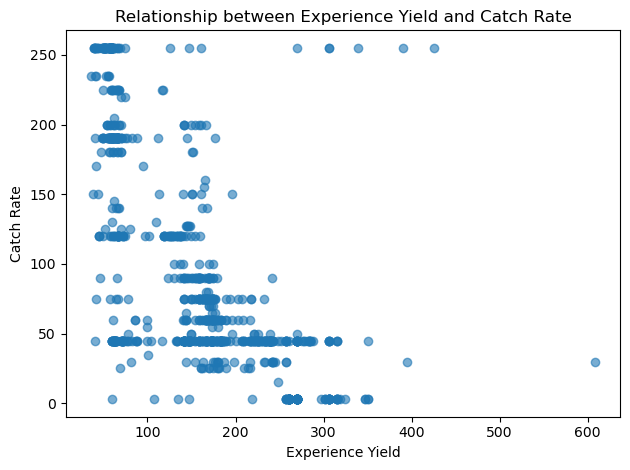

In [22]:
#5. Experience Yield VS Catch Rate
print("\nInfo for Experience Yield and Catch Rate:")

plt.scatter(df['Experience Yield'], df['Catch Rate'], alpha=0.6)
plt.title('Relationship between Experience Yield and Catch Rate')
plt.xlabel('Experience Yield')
plt.ylabel('Catch Rate')
plt.tight_layout()
plt.show()

* There are many data points with experience yields below 200 and varied catch rates. Experience Yield averages 153.7, with a standard deviation of 79.25. Data ranges from 36 to 608(an outlier). 
* Few Pokemon have experience yields above 500 and low catch rates. Catch Rate averages 93.83 with a standard deviation of 75.49. Catch Rates range from 3 to 255. Half of Pokémon are caught at 60 or less.
* The statistics and plot suggest that some Pokemon with high experience may be harder to catch due to a lower catch rate. However, many Pokemon with lower experience yields are easier to catch at different rates. But some Pokemon have a high catch rate and experience yield at the same time(top middle points in the plot).


# 3.Create correlation matrix

In [23]:
# attributes for correlation
attributes = ['Height', 'Weight', 
                   'Male Ratio', 'Female Ratio', 
                   'Health EV', 'Attack EV', 'Defense EV', 
                   'Special Attack EV', 'Special Defense EV', 'Speed EV', 
                   'Catch Rate', 'Experience Growth Total', 
                   'Experience Yield', 'Base Happiness', 
                   'Health Base Stat', 'Attack Base Stat', 
                   'Defense Base Stat', 'Special Attack Base Stat', 
                   'Special Defense Base Stat', 'Speed Base Stat', 
                   'Cycle Count']

# Compute correlation matrix for the attribute columns
#for easier comparison, values have been rounded (too many digits)
df[attributes].corr().round(2).style.background_gradient(cmap='coolwarm')



,Height,Weight,Male Ratio,Female Ratio,Health EV,Attack EV,Defense EV,Special Attack EV,Special Defense EV,Speed EV,Catch Rate,Experience Growth Total,Experience Yield,Base Happiness,Health Base Stat,Attack Base Stat,Defense Base Stat,Special Attack Base Stat,Special Defense Base Stat,Speed Base Stat,Cycle Count
Height,1.000000,0.640000,-0.170000,-0.200000,0.100000,0.150000,0.030000,0.160000,0.020000,-0.080000,-0.330000,0.260000,0.500000,-0.360000,0.440000,0.460000,0.380000,0.400000,0.340000,0.170000,0.390000
Weight,0.640000,1.000000,-0.210000,-0.270000,0.110000,0.160000,0.190000,0.070000,-0.010000,-0.140000,-0.290000,0.270000,0.440000,-0.430000,0.430000,0.410000,0.470000,0.260000,0.300000,0.030000,0.440000
Male Ratio,-0.170000,-0.210000,1.000000,-0.090000,-0.170000,0.080000,0.000000,-0.080000,-0.110000,0.020000,0.040000,-0.180000,-0.260000,0.310000,-0.190000,-0.050000,-0.150000,-0.190000,-0.220000,-0.140000,-0.460000
Female Ratio,-0.200000,-0.270000,-0.090000,1.000000,0.020000,-0.080000,0.010000,-0.200000,-0.000000,-0.010000,0.360000,-0.240000,-0.330000,0.320000,-0.130000,-0.300000,-0.200000,-0.330000,-0.230000,-0.230000,-0.520000
Health EV,0.100000,0.110000,-0.170000,0.020000,1.000000,-0.190000,-0.140000,-0.150000,-0.120000,-0.150000,-0.060000,0.050000,0.150000,0.010000,0.500000,-0.020000,-0.030000,0.010000,0.050000,-0.070000,0.160000
Attack EV,0.150000,0.160000,0.080000,-0.080000,-0.190000,1.000000,-0.200000,-0.210000,-0.180000,-0.240000,-0.170000,0.130000,0.230000,-0.110000,0.170000,0.590000,0.070000,0.000000,-0.020000,0.080000,0.060000
Defense EV,0.030000,0.190000,0.000000,0.010000,-0.140000,-0.200000,1.000000,-0.180000,-0.050000,-0.190000,-0.080000,0.010000,0.040000,-0.020000,-0.080000,0.030000,0.570000,-0.160000,0.030000,-0.250000,-0.020000
Special Attack EV,0.160000,0.070000,-0.080000,-0.200000,-0.150000,-0.210000,-0.180000,1.000000,-0.120000,-0.160000,-0.200000,0.140000,0.310000,-0.140000,0.080000,0.040000,0.010000,0.620000,0.220000,0.180000,0.220000
Special Defense EV,0.020000,-0.010000,-0.110000,-0.000000,-0.120000,-0.180000,-0.050000,-0.120000,1.000000,-0.150000,-0.140000,-0.040000,0.130000,-0.010000,0.010000,-0.130000,0.120000,0.070000,0.500000,-0.020000,0.060000
Speed EV,-0.080000,-0.140000,0.020000,-0.010000,-0.150000,-0.240000,-0.190000,-0.160000,-0.150000,1.000000,0.000000,-0.070000,0.020000,0.070000,-0.120000,-0.070000,-0.190000,0.020000,-0.100000,0.510000,-0.050000


# overall observations
* Strong positive correlation (0.64) between height and weight. As Pokémon grow taller, their weight tends to increase as well.

* Gender Ratios - Male and Female Ratios are weakly correlated negatively (-0.09). 

* Height and Weight have weak negative correlations with Male Ratio (-0.17 and -0.21, respectively) and Female Ratio (-0.20 and -0.27, respectively).

* Special Attack Base Stat has relatively strong positive correlations with Experience Yield (0.70) and Special Defense Base Stat (0.50), suggesting that Pokémon with higher special attacks may also have strong special defenses and yield more experience.

* Health (0.65), Attack (0.64), Defense (0.53), Special Attack (0.70), Special Defense (0.68), and Speed (0.52) all exhibit strong positive correlations with Experience Yield. This suggests that Pokémon with higher base stats are likely to yield more experience when defeated.

* Pokemon with a lower Base Happiness have a higher Experience Yield (-0.28). It could be that Pokémon that are more formidable or difficult (and therefore provide more experience) are more difficult to make happy.

* There's a moderate positive correlation between Catch Rate and Female Ratio (0.36). This suggests that Pokémon with a higher proportion of females may be slightly simpler to capture.
   - The correlation between Base Happiness and Catch Rate is moderately positive (0.18). Pokémon that are happier may be slightly simpler to capture.

* Pokemon with greater weights tend to have stronger defenses (Defense Base Stat: 0.47) but may be slower (Speed Base Stat: 0.03).


* Effort Values (EVs) and Base Statistics
   - Health Base Stat correlates strongly with Health EV (0.50).
   - The correlation between Attack Base Stat and Attack EV is relatively strong (0.59).
   - Defense Base Stat has a strong correlation (0.57 correlation) with Defense EV.
   - The Special Attack Base Stat has a moderately strong correlation (0.60) with Special Attack EV.
   
* Relatively robust negative correlations with Experience Yield (-0.66) and Base Happiness (-0.5).

* Weak negative correlation (-0.29) with Weight and moderate negative correlation (-0.33) with Height.
   
* Experience Growth Total has a weak positive correlation with Experience Yield (0.27), as well as moderate positive correlations with Height (0.26) and Weight (0.27).

* Moderately negative correlations with Experience Yield (-0.28), Height (-0.36), and Weight (-0.44).

* Health Base Stat has strong correlations with Experience Yield (0.65) and Attack Base Stat (0.43).
   - The correlation between Special Attack Base Stat and Special Defense Base Stat is moderately positive (0.50).
   - The correlation between Attack Base Stat and Defense Base Stat is relatively strong (0.44).
   
* Cycle Count: Moderately negative correlations with Male Ratio (-0.46) and Female Ratio (-0.52).
   - Moderate positive correlations with Experience Yield (0.53) and Experience Growth Total (0.42).

* Relatively strong positive correlation with Experience Yield (0.70).

* Speed Base Stat: Relatively strong correlation with Speed EV (0.51).

* Strong positive correlation between Special Defense Base Stat and Special Defense EV (0.50).
   - Positive correlation with Experience Yield is moderately strong (0.68).

* Defense Base Stat has a moderately positive correlation with Weight (0.47).
   - The correlation between Health Base Stat and Weight is relatively strong (0.43).
   
* Defense EV has a moderately strong positive correlation with Weight (0.19).
   - Attack EV is moderately positively correlated with Weight (0.16 and Height 0.15) and Height (0.15).

* Health EV has a moderately negative relationship with Attack EV (-0.19) and Defense EV (-0.14). It implies that Pokémon with greater health EVs may have slightly lower attack or defense EVs.


* Cycle Count, which may be associated with the frequency of certain events or growth cycles, has relatively strong negative correlations with Male Ratio (-0.46) and Female Ratio (-0.52). Pokémon with a higher proportion of males may have fewer cycles, and vice versa.



# 4.One pair having the strongest positive and another pair with strongest negative correlation
* i. Plot both feature pairs (separately) using a scatter plot
* ii. Draw a straight line, one you think would approximately describe a linear relationship
* iii. Do you think there is a "true logical" relationship between the features?

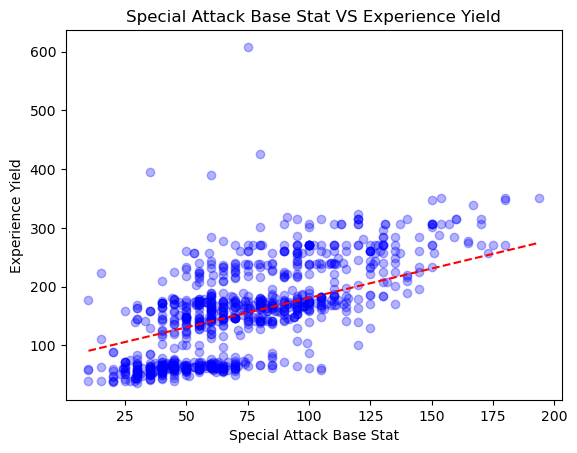

In [24]:
# Special Attack Base VS Experience Yield (strongest positive correlation of 0.70)

plt.scatter(df["Special Attack Base Stat"], df["Experience Yield"], color="blue",alpha=0.3)
plt.xlabel("Special Attack Base Stat")
plt.ylabel("Experience Yield")
plt.title("Special Attack Base Stat VS Experience Yield")

# Calculate means
x_mean = df["Special Attack Base Stat"].mean()
y_mean = df["Experience Yield"].mean()

x_min = df["Special Attack Base Stat"].min()
x_max = df["Special Attack Base Stat"].max()
y_stride = (y_mean - x_mean)# stride between x values
c = y_mean - x_mean

# Define x and y for the line
x_vals = [x_min,x_max]
y_vals = [x + y_stride for x in x_vals]

# Plot the line
plt.plot(x_vals, y_vals, linestyle="--", color='r')
plt.show()



**Special Attack Base Stat Compared to Experience Points**
- The graph indicates that a Pokemon frequently awards more experience points in relation to their Special Attack level. However, this isn't the case for all Pokemon.
- While many Pokemon don't quite follow the red line, it attempts to depict the overall pattern.
- A Pokemon does not guarantee that an overload of experience will be awarded simply because of its powerful Special Attack. This may also be impacted by other factors.
- Logical relationship exists but not strong enough. Pokemon with stronger Special Attacks might be harder to defeat, so they give more experience. But it's not a guarantee for all Pokemon.

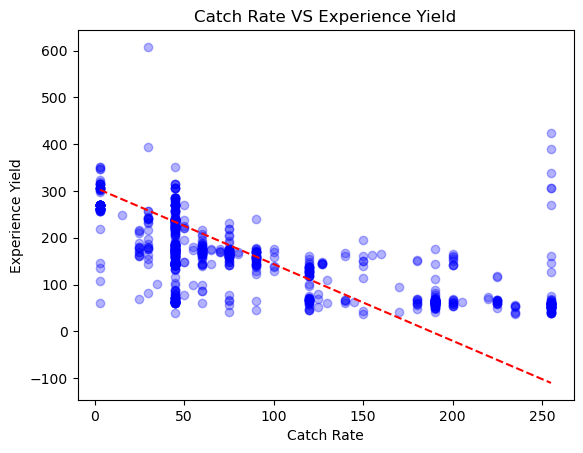

In [25]:
# Catch Rate VS Experience Yield (strongest negative correlation of -0.66)

plt.scatter(df["Catch Rate"], df["Experience Yield"],color='blue',alpha=0.3)
plt.xlabel("Catch Rate")
plt.ylabel("Experience Yield")
plt.title("Catch Rate VS Experience Yield")

# Calculate means
x_mean = df["Catch Rate"].mean()
y_mean = df["Experience Yield"].mean()

x_min = df["Catch Rate"].min()
x_max = df["Catch Rate"].max()

# Define x and y for the line using min and max values
x_vals = [x_min, x_max]
slope = - y_mean / x_mean
y_vals = [slope*(x - x_mean) + y_mean for x in x_vals] # line passing through (x_mean,y_mean)

# Plot the line
plt.plot(x_vals, y_vals, linestyle="--", color='red')

plt.show()


**Catch Rate VS Experience Yields**
- Pokemon that are simpler to catch award less experience. However, this isn't always the case.
- While quite many Pokemon does not follow this generalization, the red line illustrates an overall negative concept.
- This might suggest that although harder-to-catch Pokemon may award more experience, other considerations also come into play.
- So, probably a "subtle" logical relationship exists.

# 5.Identify a feature pair showing minimal or no correlation between them
* i. Plot the two features using a scatter plot
* ii. Can you draw a straight line (which would approximately describe a linear relationship) in
this case?
* iii. Do you think there is a "true logical" relationship between the two features?

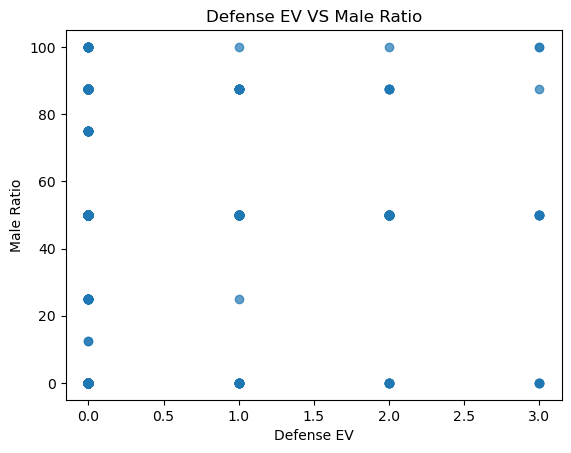

In [26]:
# Defense EV vs Male Ratio (correlation of 0.00)
plt.scatter(df["Defense EV"], df["Male Ratio"],alpha=0.7)
plt.xlabel("Defense EV")
plt.ylabel("Male Ratio")
plt.title("Defense EV VS Male Ratio")
plt.show()


* can't draw a meaningful straight line representing a linear relationship between these points.
* Definitely there doesn't seem to be a logical relationship between "Defense EV" and "Male Ratio". 